In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
import metpy
from matplotlib.colors import LinearSegmentedColormap
from utils.data import load_tc_data
from utils.plot import make_cmap
import cftime as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from numpy import inf
from scipy.stats import gaussian_kde
import matplotlib.colors as mcolors
from scipy import stats
import matplotlib.pyplot as plt
import tropycal
from tropycal import tracks
from shapely.geometry import Polygon, Point
import xarray as xr
import os
import numpy.ma as ma
import re
from matplotlib.colors import LinearSegmentedColormap
from itertools import groupby
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from global_land_mask import globe
import glob

In [40]:
ds = xr.load_dataset('/bp1/geog-tropical/data/Obs/MSWEP/3hourly_invertlat/2000342.00.nc')
lat = ds.lat.values
lon = ds.lon.values
lons, lats = np.meshgrid(lon,lat)

population_file = '/user/home/al18709/work/population/ppp_2020_10km_Aggregated_final.nc'
population_count = xr.load_dataset(population_file)
print(population_count)
data = population_count.population.values * 144
population = population_count.population.values * 144
pop = population_count * 144
pop_lats = population_count.lat
pop_lons = population_count.lon
grid_x_pop, grid_y_pop = np.meshgrid(pop_lons,pop_lats)

z = globe.is_land(lats,lons)

pop


<xarray.Dataset>
Dimensions:     (lon: 3600, lat: 1800)
Coordinates:
  * lon         (lon) float64 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 180.0
  * lat         (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
Data variables:
    population  (lat, lon) float32 -3.403e+38 -3.403e+38 ... -3.403e+38
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Nov 01 12:12:14 2023: cdo remapnn,mygrid /user/home/al1...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...


/tmp/ipykernel_54494/1712597873.py:9: RuntimeWarning: overflow encountered in multiply
  data = population_count.population.values * 144
/tmp/ipykernel_54494/1712597873.py:10: RuntimeWarning: overflow encountered in multiply
  population = population_count.population.values * 144


<xarray.Dataset>
Dimensions:     (lon: 3600, lat: 1800)
Coordinates:
  * lon         (lon) float64 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 180.0
  * lat         (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
Data variables:
    population  (lat, lon) float32 -inf -inf -inf -inf ... -inf -inf -inf -inf
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Nov 01 12:12:14 2023: cdo remapnn,mygrid /user/home/al1...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [41]:
def mask_land(data,z):
    return ma.masked_equal(data * z,0)

In [42]:
print(np.load('/user/home/al18709/work/ke_track_rain/hr/mpi6_hist_pred_qm.npy').shape)

(382908, 100, 100, 1)


In [43]:
percentiles = np.arange(0,100,0.1)
# mpi6 = mask_land(np.max(np.max(np.load('/user/home/al18709/work/ke_track_rain/hr/mpi6_hist_pred_qm.npy')[:,:,:,0],axis=1),axis=1),z)
mpi6 = np.load('/user/home/al18709/work/event_sets/wgan_mpi6_hist/mpi6_hist_max_rain_over_land.npy')
# filter out drizzle
mpi6 = mpi6[mpi6 > 4]
p1 = np.percentile(mpi6, percentiles)
del mpi6

mri6 = np.load('/user/home/al18709/work/event_sets/wgan_mri6_hist/mri6_hist_max_rain_over_land.npy')
# filter out drizzle
mri6 = mri6[mri6 > 4]
p2 = np.percentile(mri6, percentiles)
del mri6

cnrm6 = np.load('/user/home/al18709/work/event_sets/wgan_cnrm6_hist/cnrm6_hist_max_rain_over_land.npy')
# filter out drizzle
cnrm6 = cnrm6[cnrm6 > 4]
p3 = np.percentile(cnrm6, percentiles)
del cnrm6

ecearth6 = np.load('/user/home/al18709/work/event_sets/wgan_ecearth6_hist/ecearth6_hist_max_rain_over_land.npy')
# filter out drizzle
ecearth6 = ecearth6[ecearth6 > 4]
p4 = np.percentile(ecearth6, percentiles)
del ecearth6

miroc6 = np.load('/user/home/al18709/work/event_sets/wgan_miroc6_hist/miroc6_hist_max_rain_over_land.npy')
# filter out drizzle
miroc6 = miroc6[miroc6 > 4]
p5 = np.percentile(miroc6, percentiles)
del miroc6

# canesm = np.load('/user/home/al18709/work/event_sets/wgan_canesm_hist/canesm_hist_max_rain_over_land.npy')
# # filter out drizzle
# canesm = canesm[canesm > 1]
# p6 = np.percentile(canesm, percentiles)
# del canesm

ukmo = np.load('/user/home/al18709/work/event_sets/wgan_ukmo_hist/ukmo_hist_max_rain_over_land.npy')
# filter out drizzle
ukmo = ukmo[ukmo > 1]
p7 = np.percentile(ukmo, percentiles)
del ukmo

ipsl6 = np.load('/user/home/al18709/work/event_sets/wgan_ipsl6_hist/ipsl6_hist_max_rain_over_land.npy')
# filter out drizzle
ipsl6 = ipsl6[ipsl6 > 4]
p8 = np.percentile(ipsl6, percentiles)
del ipsl6

# mswep_rain = np.expand_dims(np.load('/user/home/al18709/work/CMIP6/MSWEP/storm_rain/storm_rain_tcs_and_ts.npy'),axis=-1)
mswep = np.load('/user/home/al18709/work/event_sets/mswep_obs/mswep_obs_max_rain_over_land.npy')
mswep = mswep[mswep > 4]
q = np.percentile(mswep, percentiles)
del mswep

p_min = np.min([p1,p2,p3,p4,p5,p7,p8],axis=0)
p_max = np.max([p1,p2,p3,p4,p5,p7,p8],axis=0)
p = np.mean([p1,p2,p3,p4,p5,p7,p8],axis=0)

In [44]:
mpi6 = np.load('/user/home/al18709/work/event_sets/wgan_mpi6_ssp585/mpi6_ssp585_max_rain_over_land.npy')
# filter out drizzle
mpi6 = mpi6[mpi6 > 4]
p1 = np.percentile(mpi6, percentiles)
del mpi6

mri6 = np.load('/user/home/al18709/work/event_sets/wgan_mri6_ssp585/mri6_ssp585_max_rain_over_land.npy')
# filter out drizzle
mri6 = mri6[mri6 > 4]
p2 = np.percentile(mri6, percentiles)
del mri6

cnrm6 = np.load('/user/home/al18709/work/event_sets/wgan_cnrm6_ssp585/cnrm6_ssp585_max_rain_over_land.npy')
# filter out drizzle
cnrm6 = cnrm6[cnrm6 > 4]
p3 = np.percentile(cnrm6, percentiles)
del cnrm6

ecearth6 = np.load('/user/home/al18709/work/event_sets/wgan_ecearth6_ssp585/ecearth6_ssp585_max_rain_over_land.npy')
# filter out drizzle
ecearth6 = ecearth6[ecearth6 > 4]
p4 = np.percentile(ecearth6, percentiles)
del ecearth6

miroc6 = np.load('/user/home/al18709/work/event_sets/wgan_miroc6_ssp585/miroc6_ssp585_max_rain_over_land.npy')
# filter out drizzle
miroc6 = miroc6[miroc6 > 4]
p5 = np.percentile(miroc6, percentiles)
del miroc6

canesm = np.load('/user/home/al18709/work/event_sets/wgan_canesm_ssp585/canesm_ssp585_max_rain_over_land.npy')
# filter out drizzle
canesm = canesm[canesm > 1]
p6 = np.percentile(canesm, percentiles)
del canesm

ukmo = np.load('/user/home/al18709/work/event_sets/wgan_ukmo_ssp585/ukmo_ssp585_max_rain_over_land.npy')
# filter out drizzle
ukmo = ukmo[ukmo > 1]
p7 = np.percentile(ukmo, percentiles)
del ukmo

ipsl6 = np.load('/user/home/al18709/work/event_sets/wgan_ipsl6_ssp585/ipsl6_ssp585_max_rain_over_land.npy')
# filter out drizzle
ipsl6 = ipsl6[ipsl6 > 4]
p8 = np.percentile(ipsl6, percentiles)
del ipsl6

p585_min = np.min([p1,p2,p3,p4,p5,p7,p8],axis=0)
p585_max = np.max([p1,p2,p3,p4,p5,p7,p8],axis=0)
p585 = np.mean([p1,p2,p3,p4,p5,p7,p8],axis=0)

11.541666666666666
7.255141670789155
3.8905817533054665
8.13291483507788


/tmp/ipykernel_54494/2709664988.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  m = plt.scatter(np.array(range(len(p)))/10,q,vmin=0,vmax=100, alpha=0.9,color=blue)


(0.0, 28.0)

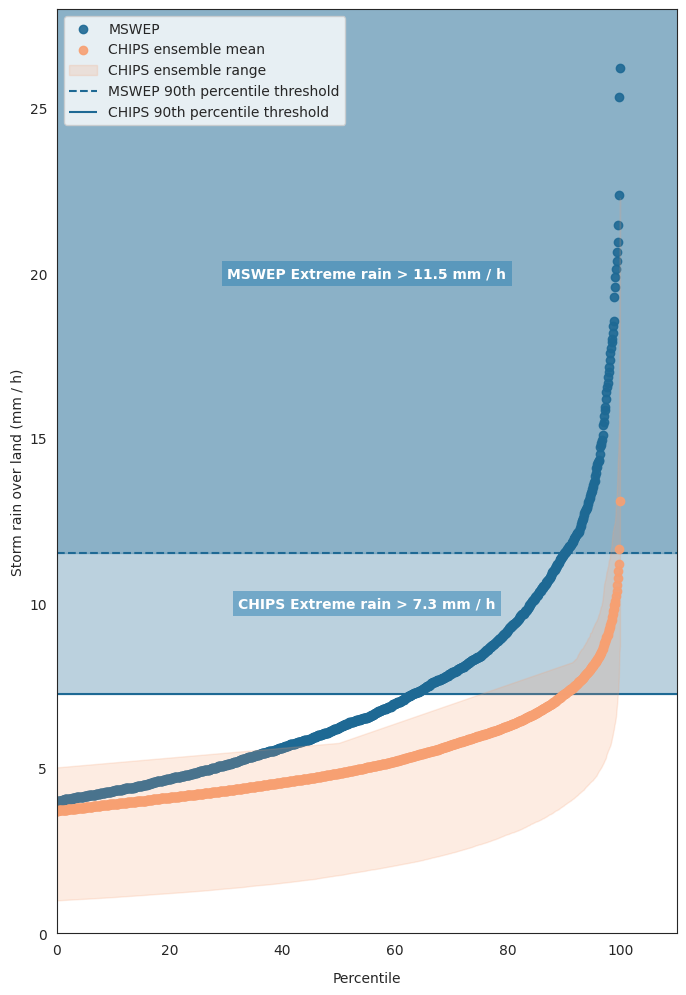

In [45]:
# extreme rain over land, because using a threshold over water - skews results to just water rain
# 50 mm is relative to rain guages
# this way is relative to the scale of the dataset - looking at 90th percentile of land-based tc rain. If the rain exceeds this then we label it as extreme tc rain

sns.set_style("white")
plt.figure(figsize=(8, 12))
ax = plt.axes()
pcolour = '#f7a072'
blue = '#1e6994'
# m = plt.scatter(np.array(range(len(p)))/10,q/3,c=percentiles,cmap='viridis',vmin=0,vmax=100, alpha=0.9)
m = plt.scatter(np.array(range(len(p)))/10,q,vmin=0,vmax=100, alpha=0.9,color=blue)
plt.scatter(np.array(range(len(p)))/10,p, alpha=0.9,color=pcolour)
# plt.scatter(np.array(range(len(p585)))/10,p585, alpha=0.9,color='White')
plt.fill_between(x=np.array(range(len(p)))/10, y1=p_min, y2=p_max, color=pcolour, alpha=0.2)
plt.ylabel('Storm rain over land (mm / h)') # this is low because it includes all storm rain that hits the land
plt.xlabel('Percentile',labelpad=10)
plt.xticks([0,20,40,60,80,100])

# cbar = plt.colorbar(m,label='Percentile')
# plt.yscale('symlog')
# plt.xscale('log')
# plt.hlines(50,0,110,linestyle='dotted',color=blue)
plt.hlines(q[900],0,110,linestyle='dashed',color=blue,zorder=0)
plt.hlines(p[900],0,110,color=blue,zorder=0)
plt.legend(['MSWEP','CHIPS ensemble mean','CHIPS ensemble range','MSWEP 90th percentile threshold','CHIPS 90th percentile threshold'],loc='upper left')


x = np.arange(-10, 120)
plt.fill_between(x=x, y1=q[900], y2=30, color=blue, alpha=0.3,zorder=0)
plt.text(55, 20, f'MSWEP Extreme rain > 11.5 mm / h', color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.5, edgecolor='none'))
print(q[900])
plt.fill_between(x=x, y1=p[900], y2=30, color=blue, alpha=0.3,zorder=0)
plt.text(55, 10, f'CHIPS Extreme rain > 7.3 mm / h', color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.5, edgecolor='none'))
print(p[900])
print(p_min[900])
print(p_max[900])
# plt.fill_between(x=x, y1=50, y2=60, color=blue, alpha=0.3,zorder=0)
# plt.text(55, 55, f'WMO Extreme rain > 50 mm / h', color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.5, edgecolor='none'))


tick_positions = np.linspace(0, 100, 11)  # Positions from 0% to 100%
tick_labels = [0,20,40,60,80,100]
# cbar.set_ticklabels(tick_labels)
plt.xlim(0, 110)
plt.ylim(0, 28)
# extent = [0, 120, 0, 28] 
# ax.set_extent(extent)

# plt.savefig('extreme_threshold2.png',bbox_inches='tight')
# https://severeweather.wmo.int/observation.html#:~:text=Definition%20of%20Heavy%20Rain%2FSnow,in%20the%20past%2024%20hours.
# 50 mm in last 24 hours
# https://community.wmo.int/en/activity-areas/aviation/hazards/precipitation
#  Heavy rain is defined as rates in excess of 4 mm per hour while heavy showers are defined as rates in excess of 10 mm per hour. 

In [46]:
model = 'mpi6'
scenario = 'hist'
data = np.load(f'/user/home/al18709/work/event_sets/wgan_{model}_{scenario}/{model}_{scenario}_mean_extreme_global.npy')
data2 = np.load(f'/user/home/al18709/work/event_sets/wgan_{model}_{scenario}/{model}_{scenario}_count_extreme_global.npy')
data3 = np.load('/user/home/al18709/work/event_sets/mswep_obs/mswep_obs_mean_extreme_global.npy')

mpi6 = np.load('/user/home/al18709/work/event_sets/wgan_mpi6_hist/mpi6_hist_mean_extreme_global.npy')
mri6 = np.load('/user/home/al18709/work/event_sets/wgan_mri6_hist/mri6_hist_mean_extreme_global.npy')
ukmo = np.load('/user/home/al18709/work/event_sets/wgan_ukmo_hist/ukmo_hist_mean_extreme_global.npy')
canesm = np.load('/user/home/al18709/work/event_sets/wgan_canesm_hist/canesm_hist_mean_extreme_global.npy')
ecearth6 = np.load('/user/home/al18709/work/event_sets/wgan_ecearth6_hist/ecearth6_hist_mean_extreme_global.npy')
ipsl6 = np.load('/user/home/al18709/work/event_sets/wgan_ipsl6_hist/ipsl6_hist_mean_extreme_global.npy')
miroc6 = np.load('/user/home/al18709/work/event_sets/wgan_miroc6_hist/miroc6_hist_mean_extreme_global.npy')
cnrm6 = np.load('/user/home/al18709/work/event_sets/wgan_cnrm6_hist/cnrm6_hist_mean_extreme_global.npy')

mpi6_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_mpi6_ssp245/mpi6_ssp245_mean_extreme_global.npy')
mri6_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_mri6_ssp245/mri6_ssp245_mean_extreme_global.npy')
ukmo_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_ukmo_ssp245/ukmo_ssp245_mean_extreme_global.npy')
canesm_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_canesm_ssp245/canesm_ssp245_mean_extreme_global.npy')
ecearth6_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_ecearth6_ssp245/ecearth6_ssp245_mean_extreme_global.npy')
ipsl6_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_ipsl6_ssp245/ipsl6_ssp245_mean_extreme_global.npy')
miroc6_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_miroc6_ssp245/miroc6_ssp245_mean_extreme_global.npy')
cnrm6_ssp585 = np.load('/user/home/al18709/work/event_sets/wgan_cnrm6_ssp245/cnrm6_ssp245_mean_extreme_global.npy')

In [47]:
print(np.sum(mpi6_ssp585 - mpi6))
print(np.sum(mri6_ssp585 - mri6))
print(np.sum(ukmo_ssp585 - ukmo))

-4336648.409344067
-1241791.0491696168
-2869616.2869707854


In [48]:
def rain_threshold(data):
    # return (data3 * [data3 > 7.8])[0,:,:]
    return (data * [data > 7.3])[0,:,:]

In [49]:
print(data3.shape)
data3 = (data3 * [data3 > 11.8])[0,:,:]
# data4 = (data4 * [data4 > 4.8])[0,:,:]
mpi6 = rain_threshold(mpi6)
mri6 = rain_threshold(mri6)
ukmo = rain_threshold(ukmo)
canesm = rain_threshold(canesm)
ecearth6 = rain_threshold(ecearth6)
ipsl6 = rain_threshold(ipsl6)
miroc6 = rain_threshold(miroc6)
cnrm6 = rain_threshold(cnrm6)

mpi6_ssp585 = rain_threshold(mpi6_ssp585)
mri6_ssp585 = rain_threshold(mri6_ssp585)
ukmo_ssp585 = rain_threshold(ukmo_ssp585)
canesm_ssp585 = rain_threshold(canesm_ssp585)
ecearth6_ssp585 = rain_threshold(ecearth6_ssp585)
ipsl6_ssp585 = rain_threshold(ipsl6_ssp585)
miroc6_ssp585 = rain_threshold(miroc6_ssp585)
cnrm6_ssp585 = rain_threshold(cnrm6_ssp585)

print(data3.shape)

(1800, 3600)


(1800, 3600)


In [50]:
hist_rain_model_agreement = np.zeros(lats.shape)
models = ['canesm','cnrm6','ecearth6','ipsl6','miroc6','mpi6','mri6','ukmo'] #ukmo
for model in models:
    print(model)
    model_says_rain = globals()[f'{model}'] > 0
    hist_rain_model_agreement = hist_rain_model_agreement + model_says_rain

hist_rain_model_agreement = hist_rain_model_agreement >= 8


ssp585_rain_model_agreement = np.zeros(lats.shape)
models = ['canesm_ssp585','cnrm6_ssp585','ecearth6_ssp585','ipsl6_ssp585','miroc6_ssp585','mpi6_ssp585','mri6_ssp585','ukmo_ssp585'] #ukmo
for model in models:
    print(model)
    model_says_rain = globals()[f'{model}'] > 0
    ssp585_rain_model_agreement = ssp585_rain_model_agreement + model_says_rain

ssp585_rain_model_agreement = ssp585_rain_model_agreement >= 8


canesm
cnrm6
ecearth6
ipsl6
miroc6
mpi6
mri6
ukmo
canesm_ssp585
cnrm6_ssp585
ecearth6_ssp585
ipsl6_ssp585
miroc6_ssp585
mpi6_ssp585
mri6_ssp585
ukmo_ssp585


In [51]:
colour1 = "#bf8021"
colour1 = '#DA942A'
drier_cmap = LinearSegmentedColormap.from_list('drier_cmap', [colour1, colour1])

colour2 = "#216c9e"
wetter_cmap = LinearSegmentedColormap.from_list('wetter_cmap', [colour2, colour2])

colour3 = "#9e2192"
colour3 = '#CC6677'
colour3 = '#88CCEE'
extreme_cmap = LinearSegmentedColormap.from_list('wetter_cmap', [colour3, colour3])

colour4 = "#58b1ed"
hist_cmap = LinearSegmentedColormap.from_list('hist_cmap', [colour4, colour4])

In [52]:
condition = (hist_rain_model_agreement == True) & (ssp585_rain_model_agreement == True)
historical_rain = hist_rain_model_agreement * condition

condition = (hist_rain_model_agreement == True)
historical_rain_all = hist_rain_model_agreement * condition

condition = (hist_rain_model_agreement == False) & (ssp585_rain_model_agreement == True)
new_rain = ssp585_rain_model_agreement * condition # newly exposed to rain that weren't before

condition = (hist_rain_model_agreement == True) & (ssp585_rain_model_agreement == False)
new_dry = hist_rain_model_agreement * condition

# calculate area of land affected sqkm
# land_hist = np.sum(historical_rain * z) * 100 
land_hist = np.sum(historical_rain_all * z) * 100 
land_newly_exposed = np.sum(new_rain * z) * 100
land_newly_unexposed = np.sum(new_dry * z) * 100

print(land_hist)
print(land_newly_exposed)
print(land_newly_unexposed)

# calculate population affected
population = pop.population.values
population[population == -inf] = 0
# pop_hist = np.sum(historical_rain * population)
pop_hist = np.sum(historical_rain_all * population)
pop_newly_exposed = np.sum(new_rain * population)
pop_newly_unexposed = np.sum(new_dry * population)

print(pop_hist)
print(pop_newly_exposed)
print(pop_newly_unexposed)

# ssp585_rain_model_agreement 
# hist_rain_model_agreement 

4872700
1266100
2501100
3273043500.0
179080220.0
905110140.0


In [53]:
# Function to check if a point is within a polygon
from matplotlib.path import Path
# Function to check if a point is within a polygon
def point_in_polygon(points, polygon):
    path = Path(polygon)
    return path.contains_points(points)

In [54]:
def correct_pop(data):
    population_flip = data[::-1, :]
    blank_rows = np.zeros((120, population_flip.shape[1]))  # Create an array of zeros with the same number of columns as arr
    population_inserted = np.insert(population_flip, 0, blank_rows, axis=0)
    return population_inserted[:-120,:]

In [55]:

basins = {
    'NA': [ (-105, 25), (-105, 89),(-95, 89), (-1, 89), (-1, 0), (-65, 0)],
    'NI': [(30,0),(30,89),(100,89),(100,0),(30,0)],
    'NWP': [(100,0),(100,89),(180,89),(180,0)],
    'NEP': [(-180,0),(-180,89),(-105,89),(-105,25),(-65,0)],
    'SIO': [(20,-89),(20,0),(135,0),(135,-89)],
    'SWP': [(135,-89),(135,0),(180,0),(180,-89)],
    'SA': [(-65,-89),(-65,0),(0,0),(0,-89)],
}

# Create a boolean mask for each basin
lons2 = (lons + 180)
basin_masks = {}
# calculate population affected
population = pop.population.values
population[population == -inf] = 0
population = correct_pop(population)

# loop through basins
for basin, vertices in basins.items():
    vertices = np.array(vertices)
    print(basin)
    # print(vertices.shape)
    
    n,m = lons.shape
    points = []
    for i in range(n):
        for j in range(m):
            points.append((lons[i,j],lats[i,j]))
    globals()[f'{basin}_mask'] = np.zeros_like(lons, dtype=bool)
    globals()[f'{basin}_mask'] |= point_in_polygon(points, vertices).reshape((1800,3600) )

    # calculate area of land affected sqkm
    globals()[f'{basin}_land_hist'] = np.sum(historical_rain_all * z * globals()[f'{basin}_mask']) * 100 
    globals()[f'{basin}_land_newly_exposed'] = np.sum(new_rain * z * globals()[f'{basin}_mask']) * 100
    globals()[f'{basin}_land_newly_unexposed'] = np.sum(new_dry * z * globals()[f'{basin}_mask']) * 100

    print('land exposed historically: ',globals()[f'{basin}_land_hist'])
    print('land newly exposed: ',globals()[f'{basin}_land_newly_exposed'])
    print('land newly unexposed : ',globals()[f'{basin}_land_newly_unexposed'])
    
    globals()[f'{basin}_pop_hist'] = np.sum(historical_rain_all * globals()[f'{basin}_mask'] * population)
    globals()[f'{basin}_pop_newly_exposed'] = np.sum(new_rain * globals()[f'{basin}_mask'] * population)
    globals()[f'{basin}_pop_newly_unexposed'] = np.sum(new_dry * globals()[f'{basin}_mask'] * population)

    print('population exposed historically: ',globals()[f'{basin}_pop_hist'])
    print('population newly exposed: ',globals()[f'{basin}_pop_newly_exposed'])
    print('population newly unexposed: ',globals()[f'{basin}_pop_newly_unexposed'])

NA
land exposed historically:  189300
land newly exposed:  385600
land newly unexposed :  57900
population exposed historically:  40227240.0
population newly exposed:  33235340.0
population newly unexposed:  10415542.0
NI
land exposed historically:  260900
land newly exposed:  290700
land newly unexposed :  198900
population exposed historically:  92162696.0
population newly exposed:  176075180.0
population newly unexposed:  60119892.0
NWP
land exposed historically:  1274200
land newly exposed:  359500
land newly unexposed :  274300
population exposed historically:  546855300.0
population newly exposed:  90867464.0
population newly unexposed:  58700236.0
NEP
land exposed historically:  338400
land newly exposed:  92100
land newly unexposed :  157500
population exposed historically:  33588268.0
population newly exposed:  7651829.0
population newly unexposed:  22967038.0
SIO
land exposed historically:  1805400
land newly exposed:  94900
land newly unexposed :  1143200
population exposed 

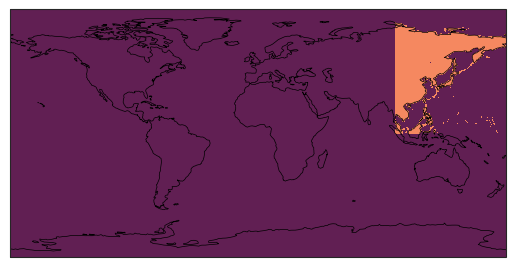

In [56]:
# ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.contourf(lons,lats,NA_mask)
# ax.contourf(lons,lats,SA_mask & (population > 0))
# ax.contourf(lons,lats,NI_mask)
ax.contourf(lons,lats,NWP_mask & (population > 0))
# ax.contourf(lons,lats,NEP_mask)
# ax.contourf(lons,lats,SIO_mask)
# ax.contourf(lons,lats,SWP_mask)
# ax.contourf(lons,lats,SA_mask)
# population_bool = population > 0
# population_flip = population_bool[::-1, :]
# blank_rows = np.zeros((120, population_flip.shape[1]))  # Create an array of zeros with the same number of columns as arr
# population_inserted = np.insert(population_flip, 0, blank_rows, axis=0)
# global_population = population_inserted[:-120,:]


# blank_rows = np.zeros((120, pop_new.shape[1]))  # Create an array of zeros with the same number of columns as arr
# pop_new_new = np.insert(pop_new, 0, blank_rows, axis=0)
# global_pop_new = pop_new_new[:-120,:]

# ax.contourf(lons,lats,population)
# ax.contourf(lons,lats,cnrm6_ssp585)
ax.coastlines(resolution='110m', linewidth=0.5)
# print(SA_mask)

In [57]:
print(np.sum((hist_rain_model_agreement == True)))
print(np.sum((ssp585_rain_model_agreement == False)))
print(np.sum((hist_rain_model_agreement == True) & (ssp585_rain_model_agreement == False)))

759985
5950002
319818


In [58]:
print(np.sum(ssp585_rain_model_agreement < 1))
print(np.sum(hist_rain_model_agreement > 0))

5950002
759985


In [59]:
fp = '/user/home/al18709/work/topography/topography_10km_nn.nc'
top_file = xr.load_dataset(fp,engine="netcdf4")
topography = top_file.z

In [60]:
print(topography.shape)

(1800, 3600)


In [61]:
def create_custom_diverging_colormap(colors_below_zero, colors_above_zero, name='custom_diverging_colormap'):
    """
    Create a custom diverging colormap from lists of colors for values below and above zero.
    
    Parameters:
        colors_below_zero (list): List of colors for values below zero.
        colors_above_zero (list): List of colors for values above zero.
        name (str): Name of the custom colormap.
    
    Returns:
        colormap: A LinearSegmentedColormap object representing the custom diverging colormap.
    """
    n_below = len(colors_below_zero)
    n_above = len(colors_above_zero)
    
    cmap_data = []
    
    # Add colors for values below zero
    for i, color in enumerate(colors_below_zero):
        cmap_data.append((i / (n_below - 1), color))
        
    # Add colors for values above zero
    for i, color in enumerate(colors_above_zero):
        cmap_data.append((i / (n_above - 1), color))
        
    return LinearSegmentedColormap.from_list(name, cmap_data)

# Example usage:
colors_below_zero = ['#a9d6e5', '#89c2d9', '#61a5c2','#468faf','#2c7da0','#2a6f97','#014f86','#01497c','#013a63','#013a63','#012a4a']
colors_above_zero = ['#98c9a3', '#bfd8bd', '#dde7c7','#dde7c7','#edeec9','#e6ccb2','#ddb892','#b08968','#7f5539','#ede0d4','#f4f4ed']
custom_diverging_cmap = create_custom_diverging_colormap(colors_below_zero, colors_above_zero)



In [62]:
def make_cmap(high_vals=False,low_vals=False):
	# clevs = [-12000, -10000, -8000, -6000, -4000, -3000, -2000, -1000,-500, -100, -50, 0, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
	clevs = [-12000, -10000, -8000, -6000, -4000, -3000, -2000, -1000,-500, -100, -50, 0, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
	# colours = ['#012a4a',#-12000
	# 		'#013a63',#-10000
	# 		'#013a63',#-8000
	# 		'#01497c',#-6000
	# 		'#014f86',#-4000
	# 		'#2a6f97',#-3000
	# 		'#2c7da0',#-2000
	# 		'#468faf',
	# 		'#61a5c2',
	# 		'#89c2d9',
	# 		'#93c7db',
	# 		'#a9d6e5',
	# 		'#c2e2ed',
	# 		'#dde7c7', '#bfd8bd', '#98c9a3','#dde7c7','#edeec9','#e6ccb2','#ddb892','#b08968','#ede0d4','#f4f4ed'] #'#7f5539'
	colours = ['#012a4a',#-12000
			'#013a63',#-10000
			'#013a63',#-8000
			'#01497c',#-6000
			'#014f86',#-4000
			'#2a6f97',#-3000
			'#2c7da0',#-2000
			'#468faf',
			'#61a5c2',
			'#89c2d9',
			'#93c7db',
			'#a9d6e5',
			'#c2e2ed',
			'#e5e7c7', '#cbd8bd', '#b4ccad','#a1c7a2','#d4c39b','#e6ccb2','#ddb892','#b08968','#ede0d4','#f4f4ed']

	# cmap = matplotlib.colors.ListedColormap(metpy.plots.ctables.colortables["terrain"][:len(clevs)-1], 'terrain')
	# pnorm = matplotlib.colors.BoundaryNorm(clevs, precip_cmap.N)
	N =  len(colours) * 10
	cmap = LinearSegmentedColormap.from_list('tc_colours',colours,N=N) #increasing N makes it smoother
	norm = matplotlib.colors.BoundaryNorm(clevs, cmap.N,extend='max')
	return cmap,norm

cmap,norm = make_cmap()

[-11000 -10000  -9000  -8000  -7000  -6000  -5000  -4000  -3000  -2000
  -1000      0   1000   2000   3000   4000   5000   6000   7000   8000]
(1800, 1800)
(1800, 5400)
(1800, 3600)


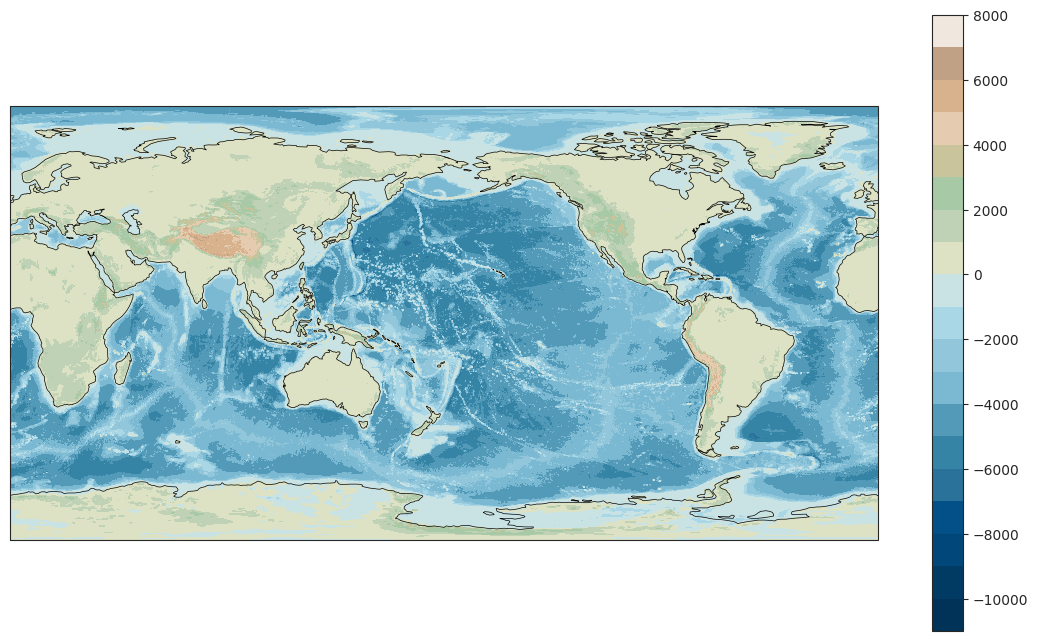

In [63]:
plt.figure(figsize=(14, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
# ax.contourf(lons,lats,population)
levels = np.arange(-11000,8800,1000)
print(levels)
# m = ax.contourf(lons,lats,topography,levels=levels,cmap=cmap,alpha=0.7)

insert = topography[:,-1800:].transpose()
print(insert.shape)
topography_inserted = np.insert(topography, 0, insert, axis=1)
print(topography_inserted.shape)
topography_new = topography_inserted[:,:3600]
# topography[:,1800:]
print(topography_new.shape)
m = ax.contourf(lons,lats,topography_new,levels=levels,cmap=cmap,alpha=1)
ax.coastlines(resolution='110m', linewidth=0.5)
plt.colorbar(m)

In [64]:
from math import log10, floor
import math
def round_to_3(x):
    if x < 1:
        return 0
    # elif x <= 9.99:
    #     return int(round(x, -int(floor(log10(x))) + (4)))
    # elif x <= 99.9:
    elif x >= 100:
        n = 3
        return int(round(x, -int(math.floor(math.log10(abs(x)))) + (n - 1)))
    else:
        n = 3
        return round(x, -int(math.floor(math.log10(abs(x)))) + (n - 1))
    # else:
    #     return int(round(x, -int(floor(log10(x))) + (3 - 1)))

x = 12.678
print(round_to_3(1.2678))
print(round_to_3(12.678))
print(round_to_3(126.78))

1.27
12.7
127


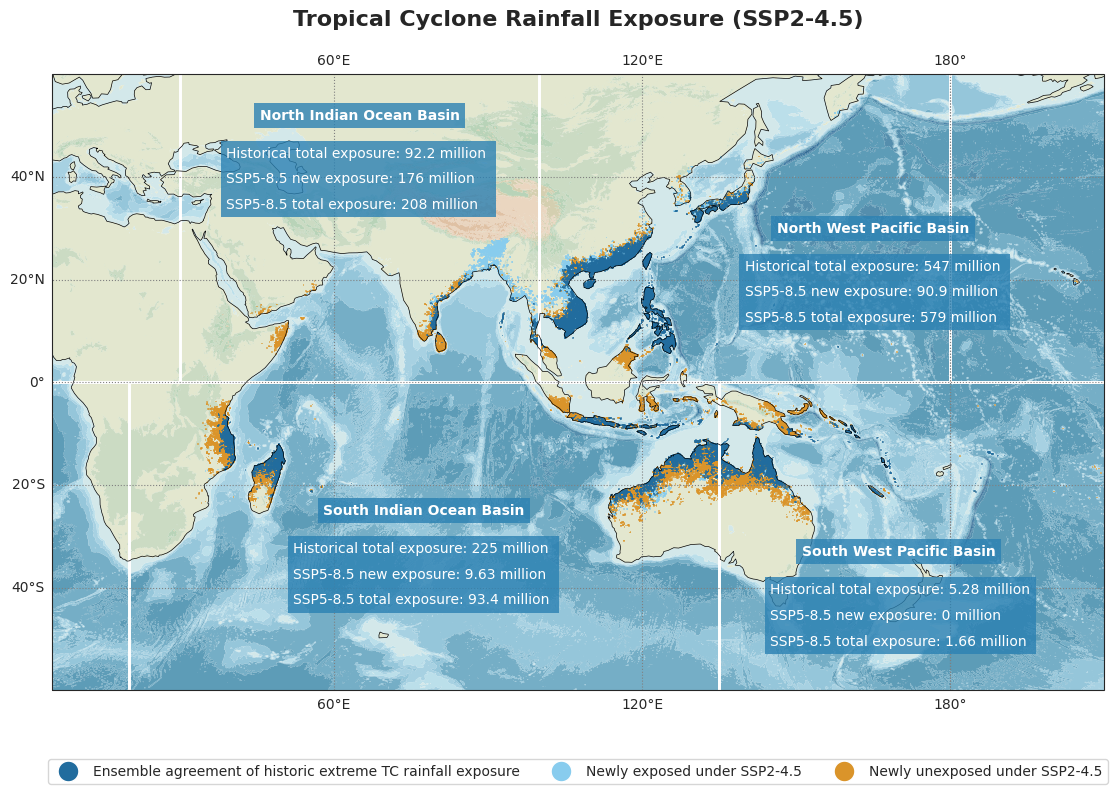

In [76]:
# mask for land and high rainfall
# land_rain = rain * z
# z2 = land_rain >= 100
# extreme_rain = land_rain * z2

# Create a new figure
plt.figure(figsize=(14, 8))
# levels = [20, 50, 100, 200, 300, 500, 1000, 2000, 3000, 5000, 7000, 10000]
# levels = range(0,10000,200)[1:]

# Define the projection (PlateCarree for a simple cylindrical projection)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))  # Centered on the Pacific Ocean
lons2 = (lons + 180)

# look at land only

# ax.contourf(lons2,lats,ma.masked_equal(data3 * z,0),cmap=drier_cmap,alpha=0.8)

# ax.contourf(lons2,lats,ma.masked_equal(ssp585_rain_model_agreement * z,0),cmap=extreme_cmap,alpha=0.8)
# ax.contourf(lons2,lats,ma.masked_equal(hist_rain_model_agreement * z,0),cmap=wetter_cmap,alpha=0.7)

# ax.contourf(lons2,lats,ma.masked_equal(new_rain * z,0),cmap=extreme_cmap,alpha=0.8)
# ax.contourf(lons2,lats,ma.masked_equal(new_dry * z,0),cmap=drier_cmap,alpha=0.8)
# ax.contourf(lons2,lats,ma.masked_equal(historical_rain * z,0),cmap=wetter_cmap,alpha=0.7)

m = ax.contourf(lons,lats,topography_new,levels=levels,cmap=cmap,alpha=0.8,antialiased=True)
ax.pcolor(lons2,lats,ma.masked_equal(new_rain * z,0),cmap=extreme_cmap,alpha=0.6)
ax.pcolor(lons2,lats,ma.masked_equal(new_dry * z,0),cmap=drier_cmap,alpha=0.6)
ax.pcolor(lons2,lats,ma.masked_equal(historical_rain * z,0),cmap=wetter_cmap,alpha=0.6)
# ax.pcolor(lons2,lats,ma.masked_equal(historical_rain_all * z,0),cmap=wetter_cmap,alpha=0.6)
# ax.contourf(lons2,lats,ma.masked_equal(new_rain * z,0),cmap=extreme_cmap,alpha=0.8,algorithm='threaded')
# ax.contourf(lons2,lats,ma.masked_equal(new_dry * z,0),cmap=drier_cmap,alpha=0.8,algorithm='threaded')
# ax.contourf(lons2,lats,ma.masked_equal(historical_rain * z,0),cmap=wetter_cmap,alpha=0.8,algorithm='threaded')

# Add coastlines with thinner lines
# ax.stock_img()
ax.coastlines(resolution='110m', linewidth=0.5)

# Add grid lines with dotted linestyle
gl = ax.gridlines(draw_labels=True, linestyle=':',color='Gray',linewidth=0.8)

# Label x and y axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set title
ax.set_title('Tropical Cyclone Rainfall Exposure (SSP2-4.5)', loc='center',pad=20,weight='bold',fontsize=16)

basins = {
    'North Indian Ocean Basin': (-150, -80, 0, 89),
    'North West Pacific Basin': (-80, 0, 0, 89),
    'South Indian Ocean Basin': (-160, -45, -89, 0),
    'South West Pacific Basin': (-45, 115, -89, 0),
    '': (-180, -160, -90, 0),
}
    
for basin, bbox in basins.items():
    if isinstance(bbox, list):
        basin_patch = plt.Polygon(bbox, edgecolor='white', facecolor='none', linewidth=2)
    else:
        # basin_patch = plt.Rectangle((bbox[0], bbox[2]), bbox[1] - bbox[0], bbox[3] - bbox[2],
        #                         edgecolor='white', facecolor='none', linewidth=2)
        basin_patch = plt.Rectangle((bbox[0], bbox[2]), bbox[1] - bbox[0], bbox[3] - bbox[2],
                                        edgecolor='white', facecolor='none', linewidth=2)
        ax.add_patch(basin_patch)
    ax.add_patch(basin_patch)

    if isinstance(bbox, list):
        text_x = (bbox[0][0] + bbox[3][0]) / 2  # Calculate x-coordinate for text
        text_y = 50  # Calculate y-coordinate for text
    else:
        text_x = (bbox[0] + bbox[1]) / 2  # Calculate x-coordinate for text
        if bbox[2] < 0:
            text_y = -50 # (bbox[2] + bbox[3]) / 2  # Calculate y-coordinate for text
        else:
            text_y = 50
    
    if basin == 'South West Pacific Basin':
        text_y = text_y + 17
        text_x = text_x + 5
        ax.text(-10, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        # ax.text(-10-25, text_y-6, f'Historical total exposure: {round_to_3((SWP_pop_hist+SWP_pop_newly_unexposed)/1000000)} million' + '\n\n'  + f'SSP5-8.5 new exposure: {round_to_3((SWP_pop_newly_exposed)/1000000)} million' + '\n\n' + f'SSP5-8.5 total exposure: {round_to_3((SWP_pop_newly_exposed + SWP_pop_hist - SWP_pop_newly_unexposed)/1000000)} million',
        #         linespacing = 0.9, color='white', fontsize=10, ha='left', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        ax.text(-10-25, text_y-6, f'Historical total exposure: {round_to_3((SWP_pop_hist)/1000000)} million' + '\n\n'  + f'SSP5-8.5 new exposure: {round_to_3((SWP_pop_newly_exposed)/1000000)} million' + '\n\n' + f'SSP5-8.5 total exposure: {round_to_3((SWP_pop_newly_exposed + SWP_pop_hist - SWP_pop_newly_unexposed)/1000000)} million',
                linespacing = 0.9, color='white', fontsize=10, ha='left', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        # ax.text(-10, text_y-15, f'SSP5-8.5 new exposure: {(SWP_pop_newly_exposed)/1000000:.2f} million',color='white', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        # ax.text(-10, text_y-25, f'SSP5-8.5 total exposure: {(SWP_pop_newly_exposed + SWP_pop_hist - SWP_pop_newly_unexposed)/1000000:.2f} million',color='white', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
    # else:
    #     ax.text(text_x, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
    
    elif basin == 'North Indian Ocean Basin':
        text_y = text_y + 2
        ax.text(text_x, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        ax.text(text_x-26, text_y-6, f'Historical total exposure: {round_to_3((NI_pop_hist)/1000000)} million \n\nSSP2-4.5 new exposure: {round_to_3((NI_pop_newly_exposed)/1000000)} million \n\nSSP2-4.5 total exposure: {round_to_3((NI_pop_newly_exposed + NI_pop_hist - NI_pop_newly_unexposed)/1000000)} million',
                linespacing = 0.9, color='white', fontsize=10, ha='left', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))

    elif basin == 'South Indian Ocean Basin':
        text_y = text_y + 25
        ax.text(text_x, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        ax.text(text_x-25.5, text_y-6, f'Historical total exposure: {round_to_3((SIO_pop_hist)/1000000)} million \n\nSSP2-4.5 new exposure: {round_to_3((SIO_pop_newly_exposed)/1000000)} million \n\nSSP2-4.5 total exposure: {round_to_3((SIO_pop_newly_exposed + SIO_pop_hist - SIO_pop_newly_unexposed)/1000000)} million',
                linespacing = 0.9, color='white', fontsize=10, ha='left', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
    
    elif basin == 'North West Pacific Basin':
        text_y = text_y - 20
        text_x = text_x + 25
        ax.text(text_x, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        ax.text(text_x-25, text_y-6, f'Historical total exposure: {round_to_3((NWP_pop_hist)/1000000)} million \n\nSSP2-4.5 new exposure: {round_to_3((NWP_pop_newly_exposed)/1000000)} million \n\nSSP2-4.5 total exposure: {round_to_3((NWP_pop_newly_exposed + NWP_pop_hist - NWP_pop_newly_unexposed)/1000000)} million',
                linespacing = 0.9, color='white', fontsize=10, ha='left', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))

   
   

# Define the colors and labels for the legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colour2, markersize=15, label='Ensemble agreement of historic extreme TC rainfall exposure'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colour3, markersize=15, label='Newly exposed under SSP2-4.5'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colour1, markersize=15, label='Newly unexposed under SSP2-4.5')
]

# Define the extent
extent = [5, 210, -60, 60] 
ax.set_extent(extent, crs=ccrs.PlateCarree())

# extent = [60, 110, 0, 20] 
# ax.set_extent(extent, crs=ccrs.PlateCarree())

# Create the legend and position it below the axes
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=3)


# Show the plot
plt.savefig('TC_basins_exposure_east_ssp245.png',bbox_inches='tight',dpi=300)

# Tropical Cyclones and Climate Change Assessment Part II: Projected Response to Anthropogenic Warming Supplementary

# more thought on 1m threshold - 1m per year/season, 1m per storm, rainfall / nstorms - too angled towards intensity change which isn't explored with dynamical, height of building or similar
# 245 in supplementary
# account for decrease in rain extent blue for more rain, red for less rain in SSP5-8.5

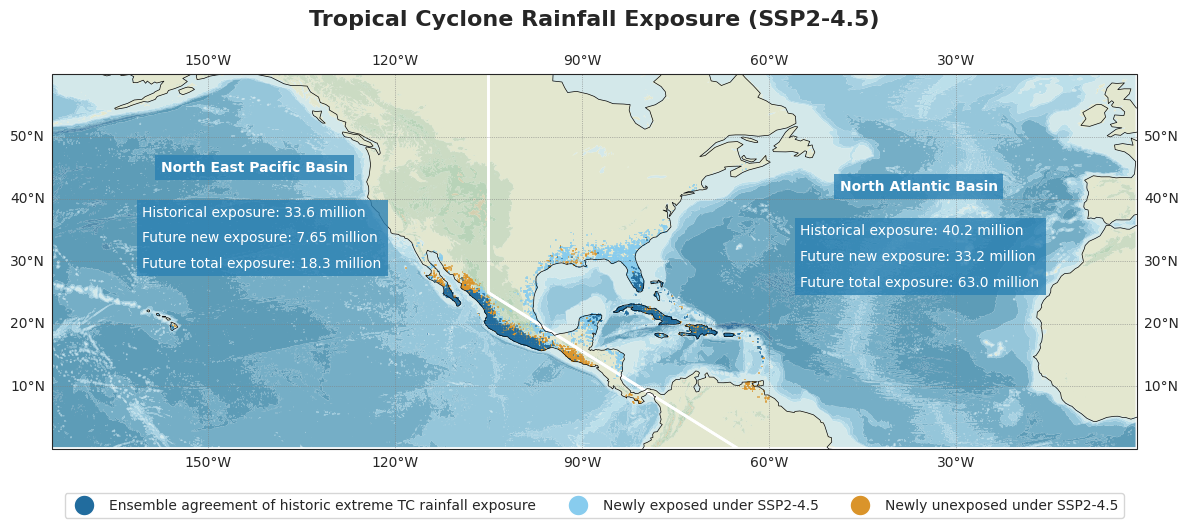

In [66]:
# mask for land and high rainfall
# land_rain = rain * z
# z2 = land_rain >= 100
# extreme_rain = land_rain * z2

# Create a new figure
plt.figure(figsize=(14, 8))
# levels = [20, 50, 100, 200, 300, 500, 1000, 2000, 3000, 5000, 7000, 10000]
# levels = range(0,10000,200)[1:]

# Define the projection (PlateCarree for a simple cylindrical projection)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))  # Centered on the Pacific Ocean
lons2 = (lons + 180)


# look at land only
m = ax.contourf(lons,lats,topography_new,levels=levels,cmap=cmap,alpha=0.8,antialiased=True)
ax.pcolor(lons2,lats,ma.masked_equal(new_rain * z,0),cmap=extreme_cmap,alpha=0.6)
ax.pcolor(lons2,lats,ma.masked_equal(new_dry * z,0),cmap=drier_cmap,alpha=0.6)
ax.pcolor(lons2,lats,ma.masked_equal(historical_rain * z,0),cmap=wetter_cmap,alpha=0.6)
ax.coastlines(resolution='110m', linewidth=0.5)

# Add grid lines with dotted linestyle
gl = ax.gridlines(draw_labels=True, linestyle=':',color='Gray',linewidth=0.5)

# Label x and y axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set title
ax.set_title('Tropical Cyclone Rainfall Exposure (SSP2-4.5)', loc='center',pad=20,weight='bold',fontsize=16)

basins = {
    'North Atlantic Basin': [ (75, 25), (75, 89),(85, 89), (179, 89), (179, 0), (115, 0)],
    'North East Pacific Basin': [(0,0),(0,89),(75,89),(75,25),(115,0)],
    'South Atlantic Basin': (115, 180, -89, 0),
    '': (-180, -160, -90, 0),
}
    
for basin, bbox in basins.items():
    if isinstance(bbox, list):
        basin_patch = plt.Polygon(bbox, edgecolor='white', facecolor='none', linewidth=2)
    else:
        # basin_patch = plt.Rectangle((bbox[0], bbox[2]), bbox[1] - bbox[0], bbox[3] - bbox[2],
        #                         edgecolor='white', facecolor='none', linewidth=2)
        basin_patch = plt.Rectangle((bbox[0], bbox[2]), bbox[1] - bbox[0], bbox[3] - bbox[2],
                                        edgecolor='white', facecolor='none', linewidth=2)
        ax.add_patch(basin_patch)
    ax.add_patch(basin_patch)

    if isinstance(bbox, list):
        text_x = (bbox[0][0] + bbox[3][0]) / 2  # Calculate x-coordinate for text
        text_y = 50  # Calculate y-coordinate for text
    else:
        text_x = (bbox[0] + bbox[1]) / 2  # Calculate x-coordinate for text
        if bbox[2] < 0:
            text_y = -50 # (bbox[2] + bbox[3]) / 2  # Calculate y-coordinate for text
        else:
            text_y = 50
    # ax.text(text_x, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
    if basin == 'North Atlantic Basin':
        text_x = text_x + 17
        text_y = text_y - 8
        ax.text(text_x, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        ax.text(text_x-19, text_y-6, f'Historical exposure: {round_to_3((NA_pop_hist)/1000000)} million \n\nFuture new exposure: {round_to_3((NA_pop_newly_exposed)/1000000)} million \n\nFuture total exposure: {round_to_3((NA_pop_newly_exposed + NA_pop_hist - NA_pop_newly_unexposed)/1000000)} million',
                linespacing = 0.9, color='white', fontsize=10, ha='left', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))

    elif basin == 'North East Pacific Basin':
        text_x = text_x
        text_y = text_y - 5
        ax.text(text_x, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        ax.text(text_x-18, text_y-6, f'Historical exposure: {round_to_3((NEP_pop_hist)/1000000)} million \n\nFuture new exposure: {round_to_3((NEP_pop_newly_exposed)/1000000)} million \n\nFuture total exposure: {round_to_3((NEP_pop_newly_exposed + NEP_pop_hist - NEP_pop_newly_unexposed)/1000000)} million',
                linespacing = 0.9, color='white', fontsize=10, ha='left', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        
    # elif basin == 'South Atlantic Basin':
    #     text_y = text_y + 30
    #     ax.text(text_x, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
    #     ax.text(text_x-21, text_y-6, f'Historical exposure: {round_to_3((SA_pop_hist+SA_pop_newly_unexposed)/1000000)} million \n\nFuture new exposure: {round_to_3((SA_pop_newly_exposed)/1000000)} million \n\nFuture total exposure: {round_to_3((SA_pop_newly_exposed + SA_pop_hist - SA_pop_newly_unexposed)/1000000)} million',
    #             linespacing = 0.9, color='white', fontsize=10, ha='left', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        # ax.text(text_x, text_y-20, f'Future exposure:{SA_pop_newly_exposed - SA_pop_hist}',color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
   

# Define the colors and labels for the legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colour2, markersize=15, label='Ensemble agreement of historic extreme TC rainfall exposure'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colour3, markersize=15, label='Newly exposed under SSP2-4.5'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colour1, markersize=15, label='Newly unexposed under SSP2-4.5')
]

# Define the extent
extent = [185, 359, 0, 60] 
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Create the legend and position it below the axes
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=3)


# Show the plot
plt.savefig('TC_basins_exposure_west_ssp245.png',bbox_inches='tight',dpi=300)

# Tropical Cyclones and Climate Change Assessment Part II: Projected Response to Anthropogenic Warming Supplementary

# TODO ignore SA and crop to NH

In [67]:
# rain = np.load('/user/home/al18709/work/event_sets/MSWEP/accumulated_global.npy')

In [68]:
# files = os.listdir('/user/home/al18709/work/event_sets/MSWEP/')
# sids = []
# for file in files:
#     if ('.nc' in file):
#         sid = file[6:-3]
#         sids.append(sid)

In [69]:
# calculate population exposure in historical compared to observations and work out error

In [70]:
# obs = np.load('/user/home/al18709/work/event_sets/mswep_obs/mswep_obs_mean_extreme_global.npy')
# obs = (data3 * [data3 > 11.8])[0,:,:]

In [71]:
# test = np.load('/user/home/al18709/work/ke_track_inputs/ipsl6_ssp245_topography.npy')
# print(test[1])

In [72]:
# basins = {
#     'NA': [ (-105, 25), (-105, 89),(-95, 89), (-1, 89), (-1, 0), (-65, 0)],
#     'NI': [(30,0),(30,89),(100,89),(100,0),(30,0)],
#     'NWP': [(100,0),(100,89),(180,89),(180,0)],
#     'NEP': [(-180,0),(-180,89),(-105,89),(-105,25),(-65,0)],
#     'SIO': [(20,-89),(20,0),(135,0),(135,-89)],
#     'SWP': [(135,-89),(135,0),(180,0),(180,-89)],
#     'SA': [(-65,-89),(-65,0),(0,0),(0,-89)],
# }

# Create a boolean mask for each basin
# lons2 = (lons + 180)
# basin_masks = {}
# # calculate population affected
# population = pop.population.values
# population[population == -inf] = 0
# population = correct_pop(population)

# # loop through basins
# for basin, vertices in basins.items():

#     # calculate area of land affected sqkm
#     globals()[f'{basin}_land_obs'] = np.sum((obs > 0) * z * globals()[f'{basin}_mask']) * 100 
#     print('land exposed observations: ',globals()[f'{basin}_land_obs'])
#     globals()[f'{basin}_pop_obs'] = np.sum((obs > 0) * globals()[f'{basin}_mask'] * population)
    # print('population exposed historically: ',globals()[f'{basin}_pop_obs'])




In [73]:
# # ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
# ax = plt.axes(projection=ccrs.PlateCarree())
# # ax.contourf(lons,lats,NA_mask)
# # ax.contourf(lons,lats,SA_mask & (population > 0))
# # ax.contourf(lons,lats,NI_mask)
# ax.contourf(lons,lats,NWP_mask & (population > 0) & (obs > 0))
# # ax.contourf(lons,lats,NEP_mask)
# # ax.contourf(lons,lats,SIO_mask)
# # ax.contourf(lons,lats,SWP_mask)
# # ax.contourf(lons,lats,SA_mask)
# # population_bool = population > 0
# # population_flip = population_bool[::-1, :]
# # blank_rows = np.zeros((120, population_flip.shape[1]))  # Create an array of zeros with the same number of columns as arr
# # population_inserted = np.insert(population_flip, 0, blank_rows, axis=0)
# # global_population = population_inserted[:-120,:]


# # blank_rows = np.zeros((120, pop_new.shape[1]))  # Create an array of zeros with the same number of columns as arr
# # pop_new_new = np.insert(pop_new, 0, blank_rows, axis=0)
# # global_pop_new = pop_new_new[:-120,:]

# # ax.contourf(lons,lats,population)
# # ax.contourf(lons,lats,cnrm6_ssp585)
# ax.coastlines(resolution='110m', linewidth=0.5)

# print(np.sum(NWP_mask * obs))

In [74]:
# print(np.sum(population))

# print(2712835448+3002615152+11553257276+570462536+486434586+76430667+1972548)
# # 2712835448
# # 3002615152
# # 11553257276
# # 570462536
# # 486434586
# # 76430667
# # 1972548

In [75]:
# # mask for land and high rainfall
# # land_rain = rain * z
# # z2 = land_rain >= 100
# # extreme_rain = land_rain * z2

# # Create a new figure
# plt.figure(figsize=(14, 8))
# # levels = [20, 50, 100, 200, 300, 500, 1000, 2000, 3000, 5000, 7000, 10000]
# # levels = range(0,10000,200)[1:]

# # Define the projection (PlateCarree for a simple cylindrical projection)
# ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))  # Centered on the Pacific Ocean
# lons2 = (lons + 180)

# # look at land only
# m = ax.contourf(lons,lats,topography_new,levels=levels,cmap=cmap,alpha=0.8,antialiased=True)
# ax.pcolor(lons2,lats,ma.masked_equal(obs * z,0),cmap=wetter_cmap,alpha=0.8)
# # ax.pcolor(lons2,lats,ma.masked_equal(new_rain * z,0),cmap=extreme_cmap,alpha=0.6)

# # Add coastlines with thinner lines
# ax.coastlines(resolution='110m', linewidth=0.5)

# # Add grid lines with dotted linestyle
# gl = ax.gridlines(draw_labels=True, linestyle=':',color='Gray',linewidth=0.8)

# # Label x and y axes
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# # Set title
# ax.set_title('Tropical Cyclone Rainfall Exposure', loc='center',pad=20,weight='bold',fontsize=16)
# basins = {
#     'North Indian Ocean Basin': (-150, -80, 0, 89),
#     'North West Pacific Basin': (-80, 0, 0, 89),
#     'South Indian Ocean Basin': (-160, -45, -89, 0),
#     'South West Pacific Basin': (-45, 115, -89, 0),
#     # '': (-180, -160, -90, 0),
#     'North Atlantic Basin': [ (75, 25), (75, 89),(85, 89), (179, 89), (179, 0), (115, 0)],
#     'North East Pacific Basin': [(0,0),(0,89),(75,89),(75,25),(115,0)],
#     'South Atlantic Basin': (115, 180, -89, 0),
#     '': (-180, -160, -90, 0),
# }
    
# for basin, bbox in basins.items():
#     if isinstance(bbox, list):
#         basin_patch = plt.Polygon(bbox, edgecolor='white', facecolor='none', linewidth=2)
#     else:
#         # basin_patch = plt.Rectangle((bbox[0], bbox[2]), bbox[1] - bbox[0], bbox[3] - bbox[2],
#         #                         edgecolor='white', facecolor='none', linewidth=2)
#         basin_patch = plt.Rectangle((bbox[0], bbox[2]), bbox[1] - bbox[0], bbox[3] - bbox[2],
#                                         edgecolor='white', facecolor='none', linewidth=2)
#         ax.add_patch(basin_patch)
#     ax.add_patch(basin_patch)

#     if isinstance(bbox, list):
#         text_x = (bbox[0][0] + bbox[3][0]) / 2  # Calculate x-coordinate for text
#         text_y = 50  # Calculate y-coordinate for text
#     else:
#         text_x = (bbox[0] + bbox[1]) / 2  # Calculate x-coordinate for text
#         if bbox[2] < 0:
#             text_y = -50 # (bbox[2] + bbox[3]) / 2  # Calculate y-coordinate for text
#         else:
#             text_y = 50
    
#     if basin == 'South West Pacific Basin':
#         # text_y = text_y + 17
#         text_x = text_x
#         ax.text(text_x, text_y+10, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
#         ax.text(text_x, text_y+10-6, f'Exposure: {round_to_3((SWP_pop_obs)/1000000)} million',
#                 linespacing = 0.9, color='white', fontsize=10, ha='center', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        
#     elif basin == 'North Indian Ocean Basin':
#         # text_y = text_y + 2
#         ax.text(text_x, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
#         ax.text(text_x, text_y-6, f'Exposure: {round_to_3((NI_pop_obs)/1000000)} million',
#                 linespacing = 0.9, color='white', fontsize=10, ha='center', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))

#     elif basin == 'South Indian Ocean Basin':
#         # text_y = text_y + 25
#         ax.text(text_x, text_y+10, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
#         ax.text(text_x, text_y+10-6, f'Exposure: {round_to_3((SIO_pop_obs)/1000000)} million',
#                 linespacing = 0.9, color='white', fontsize=10, ha='center', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
#     elif basin == 'North West Pacific Basin':
#         # text_y = text_y - 20
#         # text_x = text_x + 25
#         ax.text(text_x, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
#         ax.text(text_x, text_y-6, f'Exposure: {round_to_3((NWP_pop_obs)/1000000)} million',
#                 linespacing = 0.9, color='white', fontsize=10, ha='center', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        
#     if basin == 'North Atlantic Basin':
#         # text_x = text_x + 20
#         # text_y = text_y - 8
#         ax.text(text_x, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
#         ax.text(text_x, text_y-6, f'Exposure: {round_to_3((NA_pop_obs)/1000000)} million',
#                 linespacing = 0.9, color='white', fontsize=10, ha='center', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))

#     elif basin == 'North East Pacific Basin':
#         # text_x = text_x + 12
#         # text_y = text_y - 38
#         ax.text(text_x, text_y, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
#         ax.text(text_x, text_y-6, f'Exposure: {round_to_3((NEP_pop_obs)/1000000)} million',
#                 linespacing = 0.9, color='white', fontsize=10, ha='center', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
        
#     elif basin == 'South Atlantic Basin':
#         # text_y = text_y + 30
#         ax.text(text_x, text_y+10, basin, color='white',weight='bold', fontsize=10, ha='center', va='center',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))
#         ax.text(text_x, text_y+10-6, f'Exposure: {round_to_3((SA_pop_obs)/1000000)} million',
#                 linespacing = 0.9, color='white', fontsize=10, ha='center', va='top',bbox=dict(facecolor='#2b81b3', alpha=0.8, edgecolor='none'))

   
   

# # Define the colors and labels for the legend
# legend_elements = [
#     Line2D([0], [0], marker='o', color='w', markerfacecolor=colour2, markersize=15, label='Obserational rainfall (MSWEP)')
# ]

# # Define the extent
# extent = [-180, 180, -60, 60] 
# ax.set_extent(extent, crs=ccrs.PlateCarree())

# # extent = [60, 110, 0, 20] 
# # ax.set_extent(extent, crs=ccrs.PlateCarree())

# # Create the legend and position it below the axes
# plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=3)


# # Show the plot
# plt.savefig('TC_basins_exposure_uncertainty_obs.png',bbox_inches='tight',dpi=300)

# # Tropical Cyclones and Climate Change Assessment Part II: Projected Response to Anthropogenic Warming Supplementary

# # more thought on 1m threshold - 1m per year/season, 1m per storm, rainfall / nstorms - too angled towards intensity change which isn't explored with dynamical, height of building or similar
# # 245 in supplementary
# # account for decrease in rain extent blue for more rain, red for less rain in SSP5-8.5